하나님의 말씀은 살아 있고 활력이 있어 좌우에 날선 어떤 검보다도 예리하여 혼과 영과 및 관절과 골수를 찔러 쪼개기까지 하며 또 마음의 생각과 뜻을 판단하나니 지으신 것이 하나도 그 앞에 나타나지 않음이 없고 우리의 결산을 받으실 이의 눈 앞에 만물이 벌거벗은 것 같이 드러나느니라 (히4:12-13)

-------

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/LectureNotes_ML.png?raw=true" width=1000></center>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

<b style="font-size:30px"> Chapter 4. 선형 회귀를 위한 뉴론 만들기 </b>

:본 단원은 참고문헌 (3)에서 대부분 발췌한 것입니다. 

--------------
파이썬 클래스와 객체에 대해 간단히 복습한 후에, 지금까지 만들어 본 경사 하강법 알고리즘을 Neuron이라는 이름의 파이썬 클래스를 만들어 봅니다. 여기서 만드는 Neuron 클래스를 다양하게 확장하며 계속해서 활용할 예정입니다. 

# Review Python Class and Object 

- Python is an object oriented programming language.
- Almost everything in Python is an object, with its properties and methods.
- A Class is like an object constructor, or a "blueprint" for creating objects.

## Definitions
- __클래스(class)__ 는 객체를 정의하기 위한 __데이터 타입__ 입니다.
- __객체(object)__ 는 클래스를 기반으로 실제로 존재하는 __데이터__ 를 의미합니다.
- __속성(attribut)__ 는 클래스가 가지고 있는 특징들을 __속성__ 입니다.
- __메소드(method)__ 는 클래스의 __연산 수행__ 을 의미합니다.

### Examples
- Person 클래스를 정의한다면, 
    - Person의 객체로는 p1, p2, p3 생성할 수 있고, 
    - Person의 속성으로 name, age, color가 있을 수 있고, 
    - Person의 메소드로는 think, sleep, drink가 있을 수 있습니다. 
- Notebook 클래스를 정의한다면, 
    - Notebook의 객체로는 gram, galaxy, macbook 생성할 수 있고, 
    - Notebook의 속성으로 brand, price, size, weight가 있을 수 있고, 
    - Notebook의 메소드로는 poweron, poweroff, display, sleep가 있을 수 있습니다. 

## 가장 간단한 클래스 생성
Notebook이라는 가장 간단한 클래스는 다음과 같이 생성합니다. 파이썬에는 노트북이란 클래스가 없기 때문에 새롭게 클래스를 정의할 수 있습니다. 
- class라는 키워드와 함께 클래스 이름의 맨 앞글자는 대문자로 입력합니다. 
- 우선 클래스 내부 함수 등의 부수적인 세팅 없이 클래스 선언만 하기 위해 pass 키워드를 입력한 것입니다. 
- 클래스, 속성, 메소드등은 모두 생성과 함께 내부적으로 초기 세팅이 필요하지만 선언만 하고 넘어가고 싶을 때는 이와 같이 pass 키워드를 사용하면 됩니다.

In [3]:
class Notebook:
    pass

In [6]:
note1 = Notebook()
id(note1)
type(note1)

__main__.Notebook

## Create a class named `Person`
Now lets create a class, `Person`. In Python, every class should derive from the `object` class. 

- The `Person` class describe a person with a name and an age. Then, `Person` class has two attributes, `name` and `age`. 
- Provide a constructor or `__init__()` method, and a method to get the name and the age.
- The `__init__()` is called automatically every time the class is being used to create a new object.

In [23]:
class Person(object):
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def whoami(self):
        print(self.name, self.age)

In [24]:
p1 = Person('john', '20')
p1.name
p1.age

'20'

## Instantiate an instance, `p1`. 
- Now we can create an __object__ or an instance of the class `Person`. 
- Name the object, `p1`.
- `p1`'s name is "John", and age 16.


In [ ]:
None

## Print the object `p1`'s name and age

__Expected Output:__
```
John
16
```

In [25]:
p1.whoami()

john 20


## Create a method 

- The class can also contain methods. Methods are used only by objects made by the same class.
- Create a method `whoami()` that prints the name and age.

In [ ]:
class Person(object):
    None

## Create another object. 
- Let the object be `p2` with name = `jean` and age = 20.
- Let `p2` invoke `whoami()` method

In [27]:
p2 = Person('jean', 20)
p2.whoami()

jean 20


## Run `p1.whoami()` 
If you see an error, and rerun it to produce the correct output.

In [28]:
p1.whoami()

john 20


## Adding a new attribute, `smoke`
    - in the object p2 or 
    - in the class Person?
    
__Sample Run:__
```
p2.smoke
True
```

In [31]:
p2.smoke = True
p2.smoke

True

## Add `smoke` attribute in the class

In [33]:
class Person(object):
    def __init__(self, name, age, smoke = False):
        self.name = name
        self.age = age
        self.smoke = True
    
    def whoami(self):
        print(self.name, self.age, self.smoke)

__Sample Run:__
```
p2.whoami()
Truejean 20 True
```

In [35]:
p2 = Person('jean', 20, True)
p2.whoami()

jean 20 True


# Neuron 클래스 만들기

클래스 이름을 선언하고 `__init__()` 생성자 메소드를 정의합니다  

## 클래스 정의하기
1. 클래스 이름은 영어 대문자로 시작하는 것이 관례입니다.
1. 클래스 안에 정의된 함수는 메소드라고 부릅니다.
1. 클래스 메소드는 `거의 항상`  self를 첫 번째 인자로 합니다.  
1. 클래스 메소드들 중에 앞뒤로 `__`가 있는 메소드는 매직(Magic) 메소드라고 부르며, 자동으로 호출됩니다. 즉 내부적(시스템)에서 호출하여 사용합니다. 

## init 메소드 정의하기

1. `__init__()` 메소드는 클래스의 객체를 만들 때 자동으로 호출된다고 하여 생성자(Constructor)라고 부릅니다.
1. `__init__()` 메소드에 정의되어 있는 변수들을 인스턴스 변수라고 하며, 객체의 자료를 저장하고 유지합니다. 
1. `__init__()` 메소드에서 인스턴스 변수들을 초기화합니다. 

## 간단한 Neuron 클래스 
`Neuron` 클래스 다음과 같이 간단하게 시작할 수 있습니다. 


- `self.w` 혹은 `self.b` 같이 self 다음에 나오는 변수들이 instance variables입니다. 
- 클래스를 생성할 때, `__init__()` 메소드가 호출되면서, 각 객체(object)의 instance variable의 값들이 초기화 됩니다.  
- 학습할 때 가중치 $w$와 편향 $b$은 시작값이 있어야 하므로 임의로 1.0으로 설정하였습니다. 

In [ ]:
class Neuron():
    def __init__(self, w, b):
        self.w = 1.0
        self.b = 1.0

# 순전파(forpass) 메소드 만들기

뉴론의 입력된 신호가 $\hat{y}$을 구하는 방향으로 진행하면 연산하는 과정을 순전파(정방향)라고 이름하였습니다. 지금까지의 모델은 일차 함수였으므로 `forpass()`메소드도 일차함수를 통해 예측값을 계산합니다. 가중치와 편향은 인스탄스(instance) 변수 $w$와 $b$에 저장되어 있는 값을 사용합니다. 

In [ ]:
def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat

위 메소드를 그림으로 표시하면 다음과 같습니다. 뉴론은 동그라미로, 3개의 입력 신호 $(w, b, x)$는 왼쪽 화살표에, 결과 신호는 오른쪽 화살표에 표시했습니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-neuron1.png?raw=true" width="400"></center>
<center>그림 1: 순방향 뉴론의 계산 </center>

$w, x, b$가 뉴론의 왼쪽에서 오른쪽 방향으로 흘러 $\hat{y}$가 됩니다. 그래서, 순방향 계산이라는 용어를 사용하였고, 이 계산도 앞에서 한 것과 같습니다. 앞으로 순방향으로 계산을 한다고 하면, $\hat{y}$을 구한다고 생각하면 됩니다. 

순방향 계산을 정리하면 다음과 같습니다. 단순한 수식이니 꼭 기억하고 넘어가기 바랍니다. 

\begin{align}
\hat{y} = wx + b
\end{align}

# 역방향 메소드 만들기

$\hat{y}$을 계산하여 $y$와의 오차를 계산하고, 오차를 이용해 $w$와 $b$의 그레디언트를 계산했던 기억을 하나요? 

\begin{align}
\frac{\partial{L}}{\partial{w}} &= - (y - \hat{y}) x  \\
\frac{\partial{L}}{\partial{b}} &= - (y - \hat{y}) \tag{1}
\end{align}

각각의 그래디언트가 뉴론에서 어떤 역할을 했는지 그림으로 표현해 보았습니다. 그러면, 역방향(backpropagraion) 계산이라는 말도 잘 이해가 될 것입니다. 영어로는 간단히 줄여서 backprop이라 말하기도 합니다.

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-neuron2.png?raw=true" width="400"></center>
<center>그림 2: 역방향 뉴론의 계산 </center>

그림을 보면, 순방향 계산을 통해 얻어낸 $\hat{y}$과 $y$의 차이, 즉 오차가 뉴론의 오른쪽 방향에서 왼쪽 방향으로 흐르는 것처럼 보입니다. 그래서, 역방향 계산이므로, __오차의 역전파(error backpropagration)__ 라고 부릅니다. 그러면, 역방향 계산도 메소드로 아래와 같이 구현합니다. 

In [ ]:
def backprop(self, x, error): 
    w_grad = x * error
    b_grad = 1 * error
    return w_grad, b_grad

앞에서 편미분을 통해 얻었던 수식을 그대로 코드로 옮기면 됩니다. 즉, 가중치의 그래디언트는 $x$와 오차(error)를 곱하고 편향의 그래디언트는 1과 오차(error)를 곱하면 됩니다.  이 후, 이 값들로 가중치와 편향을 반복해서 조정해 나가면, 점차 훈련 데이터에 최적화된 (손실 함수가 가장 작은 값인) 가중치와 편향을 얻을 것입니다. 

# 지금까지의 `Neuron` 클래스 코드

다음은 지금까지 작성한 Neuron 클래스입니다. 코드는 간단하지만 기계학습과 딥러닝이 사용하는 경사 하강법 알고리즘의 핵심이 담겨져 있습니다. 딥러닝은 이렇게 간단한 연산의 조합으로 이루어져 있습니다. 

In [ ]:
class Neuron:
    def __init__(self, w, b):
        self.w = 1.0
        self.b = 1.0

    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat

    def backprop(self, x, error): 
        w_grad = x * error
        b_grad = 1 * error
        return w_grad, b_grad
    

지금까지 과정을 조합하여 훈련 데이터를 가중치와 편향을 조정할 수 있도록 `fit()`메소드를 구현하겠습니다. 바로 이 과정이 훈련이고, 학습 과정입니다. 이 메소드는 오차 역전파를 학습하여 for문으로 구현했던 코드와 매우 비슷합니다. 

# 훈련을 위한 `fit()` 메소드 구현하기

우선 fit() 메소드의 구조를 간단히 살펴보겠습니다. 

1. 처음에는 forpass() 메소드를 호출하여 $\hat{y}$을 구합니다. 
1. 그런 다음 오차(error)를 계산하고, 
1. 그 오차로 backprop() 메소드를 호출하여 가중치와 편향에 대한 그래디언트를 구합니다. 
1. 마지막으로 그래디언트를 가중치와 편향에서 빼면 가중치와 편향의 조정이 끝납니다. 

```
        y_hat = self.forpass(x_i)                  # 순전파 계산
        error = (y_i - y_hat)                      # 오차 계산
        w_grad, b_grad = self.backprop(x_i, error) # 역방향 계산
        self.w += w_grad                           # 가중치 조정
        self.b += b_grad                           # 편향 조정
```

- 이 과정을 모든 훈련 샘플에 대해 수행하고(one epoch), 
- 적절한 가중치와 편향이 구해질만큼 반복(epochs=100)하면 됩니다. 

```
    for i in range(epochs):                            # epoch만큼 반복합니다. 
        for x_i, y_i in zip(x, y):                     # 모든 샘플에 대해 반복합니다.
```

In [38]:
class Neuron:
    def __init__(self):
        self.w = 1.0
        self.b = 1.0

    def forpass(self, x):
        y_hat = x * self.w + self.b 
        return y_hat

    def backprop(self, x, error): 
        w_grad = x * error
        b_grad = 1 * error
        return w_grad, b_grad

    def fit(self, x, y, epochs = 100): 
        for i in range(epochs):                            # epoch만큼 반복합니다. 
            for x_i, y_i in zip(x, y):                     # 모든 샘플에 대해 반복합니다.
                y_hat = self.forpass(x_i)                  # 순전파 계산
                error = (y_i - y_hat)                      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, error) # 역방향 계산
                self.w += w_grad                           # 가중치 조정
                self.b += b_grad                           # 편향 조정

# 모델 훈련하기(학습시키기)

이제 실제로 모델을 만들고 훈련(학습)시켜 보도록 하겠습니다.  `Neuron`클래스의 객체 `neuron`을 생성하고 `fit()` 메소드에 입력 데이터($x$)와 타깃 데이터($y$)를 전달하면 됩니다. 

In [39]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

x = diabetes.data[:, 2]
y = diabetes.target

In [42]:
neuron = Neuron()
neuron.fit(x, y)

123.39414383177204

# 학습이 완료된 모델의 가중치와 편향을 확인하기

학습이 완료된 가중치와 편향은 `neuron.w`와 `neuron.b`에 저장되어 있습니다. 이 값을 이용하여 산점도 위에 직선 그래프롤 그려보도록 하겠습니다.  

산점도 위에 직선을 그리기 위해서, 최소한 두 점의 (x, y)값을 알아야 합니다. 임의로 두 개의 x값은 어디로 정하면 될까요? x값들 중에 min, max를 찾고, 약간의 margin을 더하거나 감하면 될 것입니다. 그러한 min, max에 따른 예측값 즉 y값은 `neuron.w`와 `neuron.b`를 통해서 구할 수 있습니다. 두 점의 x, y를 구하고, 이를 연결하면 직선이 됩니다.

## Example: 직선을 그리기 위한 좌표 구하기

- linex : 두 점의 x 좌표 구하기
- liney : 두 점의 x 좌표에 대한 y값 즉 예측값 구하기

In [43]:
delta = (max(x) - min(x))/10
min_x, max_x = min(x) - delta, max(x) + delta
linex = [min_x, max_x]
liney = [min_x * neuron.w + neuron.b, max_x * neuron.w + neuron.b]

print(neuron.w, neuron.b)

913.5973364345905 123.39414383177204


913.5973364345905 123.39414383177204

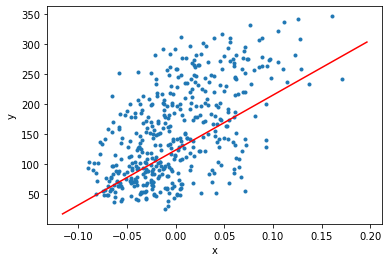

In [44]:
import matplotlib.pyplot as plt

plt.scatter(x, y, marker='.')
plt.plot(linex, liney, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<b style="font-size:24px"> 축하합니다^^. <b/>

여러분은 경사 하강법을 적용한 뉴론을 구현했습니다. 
    
신경망 모델을 사용하는 딥러닝은 항상 경사 하강법 알고리즘을 사용하므로, 경사 하강법 알고리즘이 딥러닝의 핵심 요소 중 하나라고 할 수 있습니다. 앞으로 __Neuron__ 클래스를 기반으로 더 복잡한 딥러닝 알고리즘을 만들 것입니다.  

# Exercise 

- 에폭$^{epoch}$에 따른 오차 SSE 의 변화를 관찰하기   
    앞에서 구현한 클래스 Neuron에 오차제곱합 SSE(Sum of Squared Error)를 추적할 수 있도록 인터턴스 변수를 추가하고 당뇨병 자료로 에폭에 따른 오차제곱합 SSE의 변화를 시각화 하십시오. 

## 오차제곱합 sse 인스턴스 변수와 sse 계산하기

- 오차제곱합 인스턴스 변수 `sse`는 어느 메소드에 추가해야 합니까?
    - `__init__()` 메소드에 추가하고 초기화하는 것보다 `fit()` 메소드가 낫습니다. 
    - 왜냐하면, `sse` 배열의 크기는 epoch에 따라 결정되기 때문입니다. 

__Solution__

In [45]:
class Neuron:
    def __init__(self):
        self.w = 1.0
        self.b = 1.0

    def forpass(self, x):
        y_hat = x * self.w + self.b 
        return y_hat

    def backprop(self, x, error): 
        w_grad = x * error
        b_grad = 1 * error
        return w_grad, b_grad

    def fit(self, x, y, epochs = 100): 
        self.sse = np.zeros(epochs)
        for i in range(epochs):                            # epoch만큼 반복합니다. 
            sse_i = 0
            for x_i, y_i in zip(x, y):                     # 모든 샘플에 대해 반복합니다.
                y_hat = self.forpass(x_i)                  # 순전파 계산
                error = (y_i - y_hat)                      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, error) # 역방향 계산
                self.w += w_grad                           # 가중치 조정
                self.b += b_grad                           # 편향 조정
                sse_i += error * error
            self.sse[i] = sse_i

## 학습과 모델 결과 출력하기

__Hint:__
- Diabetes 자료를 가져오기
- `Neuron`클래스 객체인 `neuron`을 생성하기 
- `neuron`객체의 `fit()` 메소드로 모델 생성하기
- `neuron.sse`로 `mse` 계산하기
- 모델의 `w`와 `b`, 또한 `mse`를 출력하여 예전의 답과 같은지 확인하기

__Expected Output:__
```
Weight: 913.5656499923714
  Bias: 123.39181064719298
   MSE: [9005.36195584 7469.28242258 7259.87058017 7227.18887467 7220.915469
 7219.36559842 7218.89987889 7218.74451808 7218.69033115 7218.67110647]
 ```
 
__Solution:__

In [47]:
import numpy as np
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

x = diabetes.data[:, 2]           # 세번째 특성(bmi) 읽어오기 
y = diabetes.target               # target/label 읽어오기

neuron = Neuron()
neuron.fit(x, y, 10)
mse = neuron.sse / len(y)
print("Weight:", neuron.w)
print("  Bias:", neuron.b)
print("   MSE:", mse)

Weight: 913.5656499923714
  Bias: 123.39181064719298
   MSE: [9005.36195584 7469.28242258 7259.87058017 7227.18887467 7220.915469
 7219.36559842 7218.89987889 7218.74451808 7218.69033115 7218.67110647]


## MSE (평균 제곱 오차) 시각화 하기

__Expected Output:__

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-diabetes11.png?raw=true" width="400"></center>
<center>그림 2: 경사하강법 오차(MSE)의 변화 </center>

__Solution:__

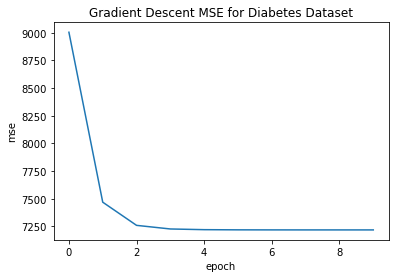

In [49]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(neuron.sse)), mse)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('Gradient Descent MSE for Diabetes Dataset')
plt.show()

# 참고문헌

1. 케라스 창시자에게 배우는 딥러닝, 프랑소와 숄레, 길벗
1. 핸즈온 머신러닝, 오렐리앙 제롱, 한빛미디어
1. 딥러닝 입문, 박해선, 이지스 퍼블리싱
1. 파이썬으로 배우는 기계학습, 김영섭, K-MOOC

-------
__Be joyful always!__ 1 Thes.5:16